# Selecting the best variables to use in regression analysis

Dataset `experimetal_dataset.txt` has 14 independent variables, organized in 14 columns. Column 15 has the dependent variable. Data values are separated by char `\t`.


Note that, in this dataset, some lines were broken before the 15 columns and so, preprocessing is mandatory.

---

In the next notebook cell, broken lines are concatenated by checking the number of elements in the list being constructed using the input line. If there are less than 15 elements in the list, the list is concatenated with the list extracted from the next line. Empty lines are also deleted, as we only want valid input.

In [1]:
import pandas as pd
import numpy as np

# read files and split line by line
arq = open("../data/raw/experimental_dataset.txt", "r")
input_line = arq.read().split("\n")

# delete unnecessary lines
del input_line[1]
del input_line[1]
del input_line[-1]
del input_line[-1]

# remove unnecessary characters and split by the column separator '\t'
processed_line = []
input_columns = list(filter(lambda x : x != '', input_line[0].replace('%', '').split("\t")))
del input_line[0]

for j, i in enumerate(input_line):
    value = list(filter(lambda x : x != '', i.split("\t")))
    if len(value) == 15:
        processed_line.append(list(map(lambda m: float(m), value)))
    else:
        processed_line.append(list(map(lambda m: float(m), value + list(filter(lambda x : x != '', input_line[j + 1].split("\t"))))))
        del input_line[j + 1]
df = pd.DataFrame(np.array(processed_line), columns=input_columns)

print(df)

         VL     VM     VP      M   VMVL   VMVM   VMVP    VMM     T     H  \
0    1849.0  209.0   62.0  245.0  11.75  13.43   7.83  15.67  32.5  48.0   
1     580.0   48.0   88.0  137.0   8.60   8.60   7.20  10.70  29.9  42.0   
2    1438.0  207.0  108.0  386.0  11.80   9.40   8.60  13.40  37.1  28.0   
3     651.0   58.0   23.0   46.0   9.60  13.70  13.70  12.00  15.7  64.0   
4     623.0   55.0   82.0  141.0   5.10   4.50   6.60   7.80  27.4  46.0   
..      ...    ...    ...    ...    ...    ...    ...    ...   ...   ...   
459   351.0   33.0   30.0   66.0   7.60  11.40   4.20  13.10  33.8  35.0   
460  1423.0  134.0   77.0  341.0  10.50  11.80   9.40  11.80  24.9  61.0   
461   584.0   84.0   71.0  187.0   7.90  11.80   5.00  47.10  28.4  57.0   
462  1847.0  156.0   34.0  252.0  11.80  13.40   7.80  18.80  33.9  32.0   
463   542.0   43.0   95.0  193.0   6.70   9.40   6.70   9.40  28.1  29.0   

       Vv   DirV    MHE    MLR   CO  
0    1.15  115.0   4.01  30.18  7.1  
1    1.40  


---

We obtain a correlation matrix using the `corr()` DataFrame function. A heatmap is created using the correlation matrix so that we can visualize how the variables interact with each other.

After analyzing both correlation matrix and heatmap, we argue that 'VL', 'VM' and 'M' are the most relevant variables to predict the dependent variable 'CO'. Since any of these variables are sufficient, we arbitrarily select variable 'VL' to proceed with the analysis.

            VL        VM        VP         M      VMVL      VMVM      VMVP  \
VL    1.000000  0.892725  0.125460  0.635456  0.526624  0.513067  0.146868   
VM    0.892725  1.000000  0.173197  0.755762  0.570628  0.461671  0.187972   
VP    0.125460  0.173197  1.000000  0.290346  0.145463  0.237025 -0.072337   
M     0.635456  0.755762  0.290346  1.000000  0.340981  0.163238  0.086327   
VMVL  0.526624  0.570628  0.145463  0.340981  1.000000  0.646706  0.573290   
VMVM  0.513067  0.461671  0.237025  0.163238  0.646706  1.000000  0.417954   
VMVP  0.146868  0.187972 -0.072337  0.086327  0.573290  0.417954  1.000000   
VMM   0.214022  0.244904  0.065337  0.050439  0.475098  0.480419  0.271917   
T     0.100064  0.127280 -0.127909  0.148949 -0.030667 -0.080685 -0.163228   
H    -0.272900 -0.247497 -0.016518 -0.236621  0.024296 -0.008356  0.236470   
Vv    0.088457  0.091559  0.071989  0.088813  0.167326  0.086886 -0.015558   
DirV  0.053796  0.051279 -0.108532  0.030351  0.178110  0.122674

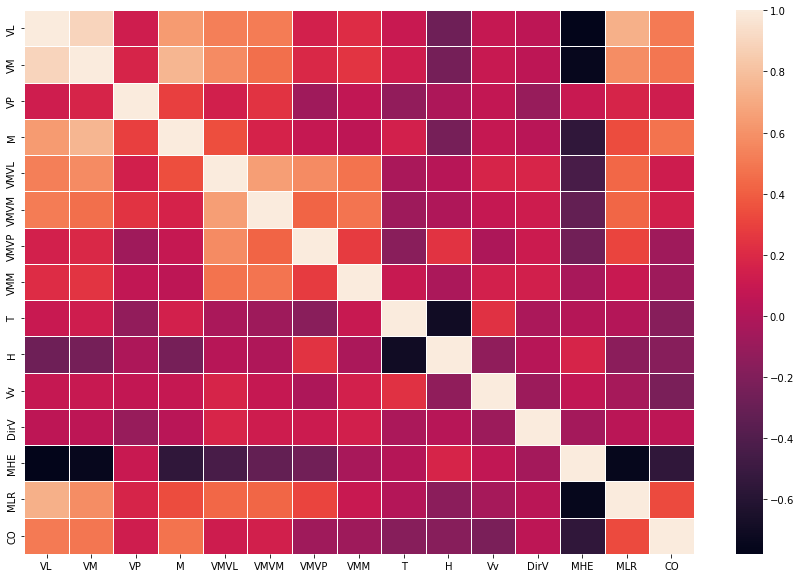

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# get correlation matrix between the variables in the dataframe
corr_mat = df.corr()
print(corr_mat)

# create a heatmap showing higher correlation in brighter colors
plt.rcParams['figure.figsize'] = [15, 10]
ax = sns.heatmap(corr_mat, linewidth=0.5)
plt.show()


---

Taking variable 'VL' into account for the prediction of 'CO', a new set of variables is created using 'VL' data as 'X' in the regression and 'CO' as 'y'. As the needed data was already available in columns 0 and 14 of the DataFrame, we concatenate both columns using numpy function `c_`. In addition, we remove "NaN" values so that they do not harm the prediction.

Using sklearn's LinearRegression, 'CO' prediction is done using variable 'VL' with `fit(x, y)` and `predict(x)` functions. The mean square error (MSE) is calculated and we draw the regression curve as a function of 'VL' using 'CO' values.

Mean squared error: 6.44


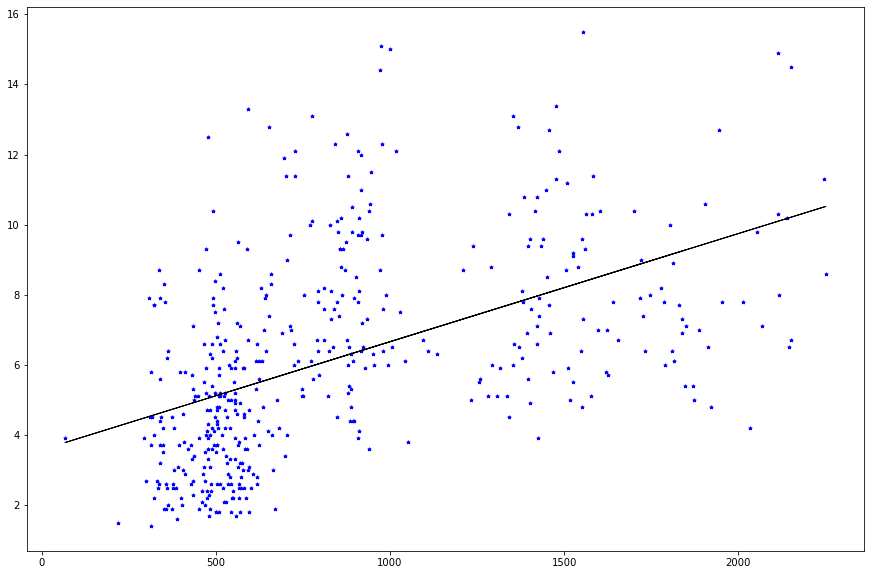

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# concatenate columns of interest to new dataframe and drop instances with NaN values
x_lab, y_lab = input_columns[0], input_columns[14]
new_df = pd.DataFrame(np.c_[df[x_lab], df[y_lab]], columns = [x_lab, y_lab])
new_df = new_df.dropna()

x = new_df[[x_lab]].values
y = new_df[[y_lab]].values

# instantiate and fit our linear regression model
linear_model = LinearRegression()
regressor = linear_model.fit(x, y)
y_pred = regressor.predict(x) 

# find MSE and draw regression curve
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))
plt.scatter(x, y, s=11, c='blue', marker='*')
plt.plot(x, y_pred, linewidth=1, color='black')


---

Now we transform the data to perform a polynomial regression by quadratic function. After retraining the model, the 'CO' prediction using 'VL' reached an MSE of 5.90, smaller than the 6.44 MSE obtained by the linear regression. Thus, we can say that the quadratic curve is able fit better to the data and make better predictions. We also draw the new regression curve with the necessary adaptations for a quadratic curve design.

Mean squared error: 5.90


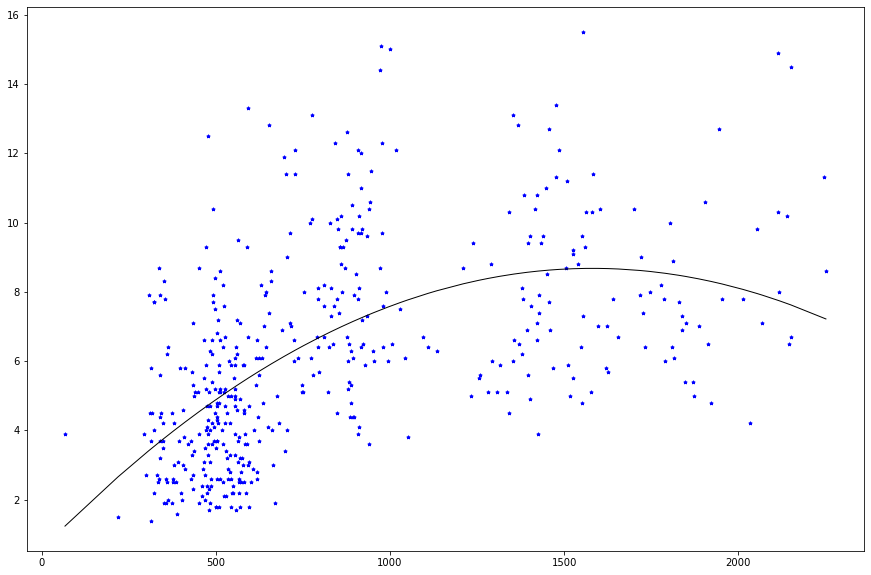

In [6]:
import operator
from sklearn.preprocessing import PolynomialFeatures

# convert quadratic features so that we can use them in a linear regression
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)
print("Mean squared error: %.2f" % mean_squared_error(y, y_poly_pred))

# get coordinates to draw regression curve
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x, y_poly_pred), key=sort_axis)
x_s, y_poly_pred = zip(*sorted_zip)

plt.scatter(x, y, s=11, c='blue', marker='*')
plt.plot(x_s, y_poly_pred, linewidth=1, color='black')


---

In this last experiment, a similar solution is applied, just changing the degree of `PolynomialFeatures` function to obtain an approximation via the cubic function. A new training of the model and a new prediction of 'CO' are performed. This time, the MSE is 5.82, smaller than the errors obtained for the regressions by linear and quadratic function. 

It can be noted that the difference between the errors of the cubic regression and the quadratic regression is smaller. This may indicate a stabilization in the forecast quality and a possible overfitting, if the polynomial degree is increased more. Again, a plot was created with the new regression curve with observations of 'CO' in relation to 'VL' on the X-axis.

Mean squared error: 5.82


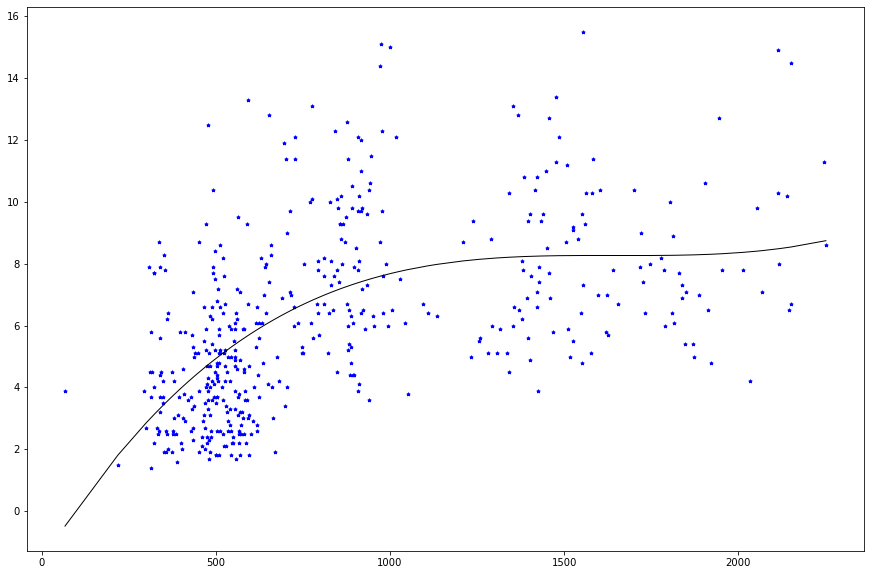

In [7]:
# get a cubic approximation of the features, so that we can run a cubic regression
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)
print("Mean squared error: %.2f" % mean_squared_error(y, y_poly_pred))

# adjust coordinates as needed for a cubic curve
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x_s, y_poly_pred = zip(*sorted_zip)

plt.scatter(x,y,s=11,c='blue',marker='*')
plt.plot(x_s, y_poly_pred, linewidth=1, color='black')